In [20]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
df = pl.read_parquet('results.parquet')
df

model,author,source,quote,care,fairness,loyalty,authority,sanctity,liberty
str,str,str,str,f64,f64,f64,f64,f64,f64
"""gemma7b""","""Donald Trump""","""https://x.com/realDonaldTrump/…","""Mimi Ramirez-Rodriguez was kid…",-8.0,-5.0,6.0,7.0,7.0,3.0
"""gemma7b""","""Donald Trump""","""https://x.com/realDonaldTrump/…","""Mimi Ramirez-Rodriguez was kid…",-8.0,-4.0,6.0,7.0,6.0,5.0
"""gemma7b""","""Donald Trump""","""https://x.com/realDonaldTrump/…","""Mimi Ramirez-Rodriguez was kid…",-8.0,-6.0,7.0,6.0,5.0,4.0
"""gemma7b""","""Donald Trump""","""https://x.com/realDonaldTrump/…","""Mimi Ramirez-Rodriguez was kid…",-7.0,-3.0,6.0,4.0,3.0,2.0
"""gemma7b""","""Donald Trump""","""https://x.com/realDonaldTrump/…","""Mimi Ramirez-Rodriguez was kid…",-8.0,-6.0,7.0,6.0,7.0,7.0
…,…,…,…,…,…,…,…,…,…
"""gpt4o""","""Paul Graham""","""https://x.com/paulg/status/185…","""Automatically disbelieving aut…",0.0,0.0,0.0,2.0,0.0,-1.0
"""gpt4o""","""Paul Graham""","""https://x.com/paulg/status/185…","""Automatically disbelieving aut…",0.0,0.0,0.0,2.0,0.0,-2.0
"""gpt4o""","""Paul Graham""","""https://x.com/paulg/status/185…","""Automatically disbelieving aut…",0.0,0.0,-2.0,5.0,0.0,-5.0


In [28]:
average_disagreement = (
    df.group_by(["quote", "model"])
    .agg([
        pl.col("care").std().alias("avg_care"),
        pl.col("fairness").std().alias("avg_fairness"),
        pl.col("loyalty").std().alias("avg_loyalty"),
        pl.col("authority").std().alias("avg_authority"),
        pl.col("sanctity").std().alias("avg_sanctity"),
        pl.col("liberty").std().alias("avg_liberty")
    ])
)

# Display the result
print("\nAverage Disagreement by Quote and Model:")
print(average_disagreement.sort("avg_care"))


Average Disagreement by Quote and Model:
shape: (534, 8)
┌─────────────────────────────────┬─────────┬──────────┬──────────────┬─────────────┬───────────────┬──────────────┬─────────────┐
│ quote                           ┆ model   ┆ avg_care ┆ avg_fairness ┆ avg_loyalty ┆ avg_authority ┆ avg_sanctity ┆ avg_liberty │
│ ---                             ┆ ---     ┆ ---      ┆ ---          ┆ ---         ┆ ---           ┆ ---          ┆ ---         │
│ str                             ┆ str     ┆ f64      ┆ f64          ┆ f64         ┆ f64           ┆ f64          ┆ f64         │
╞═════════════════════════════════╪═════════╪══════════╪══════════════╪═════════════╪═══════════════╪══════════════╪═════════════╡
│ Remember the tech backlash"? T… ┆ gemma7b ┆ 0.0      ┆ 0.0          ┆ 0.0         ┆ 0.0           ┆ 0.0          ┆ 0.516398    │
│ If terriers had long enough le… ┆ qwen25  ┆ 0.0      ┆ 0.0          ┆ 1.523884    ┆ 0.0           ┆ 0.0          ┆ 0.816497    │
│  I've encountered some 

Sometimes the tweeet was actually quoting something, so instead of including the sentiment of it (positive or negative), just calculate the magnitude

In [21]:

# Step 1: Replace values with their absolute values
columns_to_replace = ["care", "fairness", "loyalty", "authority", "sanctity", "liberty"]
# Step 2: Use with_columns to apply abs() function
df_abs = df.with_columns(
    [pl.col(column).abs().alias(column) for column in columns_to_replace]
)
# Step 3: Create the anon and non-anon dataframes separately
anon_authors = df_abs.filter(pl.col("author").str.contains("-anon"))
non_anon_authors = df_abs.filter(~pl.col("author").str.contains("-anon"))

non_anon_authors

model,author,source,quote,care,fairness,loyalty,authority,sanctity,liberty
str,str,str,str,f64,f64,f64,f64,f64,f64
"""gemma7b""","""Donald Trump""","""https://x.com/realDonaldTrump/…","""Mimi Ramirez-Rodriguez was kid…",8.0,5.0,6.0,7.0,7.0,3.0
"""gemma7b""","""Donald Trump""","""https://x.com/realDonaldTrump/…","""Mimi Ramirez-Rodriguez was kid…",8.0,4.0,6.0,7.0,6.0,5.0
"""gemma7b""","""Donald Trump""","""https://x.com/realDonaldTrump/…","""Mimi Ramirez-Rodriguez was kid…",8.0,6.0,7.0,6.0,5.0,4.0
"""gemma7b""","""Donald Trump""","""https://x.com/realDonaldTrump/…","""Mimi Ramirez-Rodriguez was kid…",7.0,3.0,6.0,4.0,3.0,2.0
"""gemma7b""","""Donald Trump""","""https://x.com/realDonaldTrump/…","""Mimi Ramirez-Rodriguez was kid…",8.0,6.0,7.0,6.0,7.0,7.0
…,…,…,…,…,…,…,…,…,…
"""gpt4o""","""Paul Graham""","""https://x.com/paulg/status/185…","""Automatically disbelieving aut…",0.0,0.0,0.0,2.0,0.0,1.0
"""gpt4o""","""Paul Graham""","""https://x.com/paulg/status/185…","""Automatically disbelieving aut…",0.0,0.0,0.0,2.0,0.0,2.0
"""gpt4o""","""Paul Graham""","""https://x.com/paulg/status/185…","""Automatically disbelieving aut…",0.0,0.0,2.0,5.0,0.0,5.0


In [22]:
summary_df = (
    non_anon_authors.group_by(["model", "author"])
    .agg([
        pl.col("care").mean().alias("mean_care"),
        pl.col("care").std().alias("std_care"),
        pl.col("fairness").mean().alias("mean_fairness"),
        pl.col("fairness").std().alias("std_fairness"),
        pl.col("loyalty").mean().alias("mean_loyalty"),
        pl.col("loyalty").std().alias("std_loyalty"),
        pl.col("authority").mean().alias("mean_authority"),
        pl.col("authority").std().alias("std_authority"),
        pl.col("sanctity").mean().alias("mean_sanctity"),
        pl.col("sanctity").std().alias("std_sanctity"),
        pl.col("liberty").mean().alias("mean_liberty"),
        pl.col("liberty").std().alias("std_liberty")
    ])
)

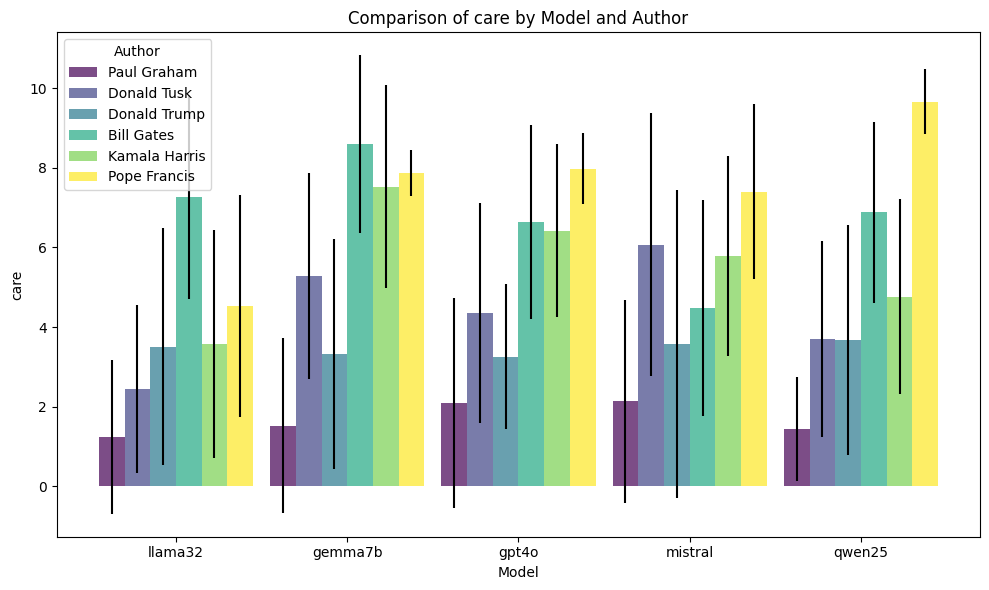

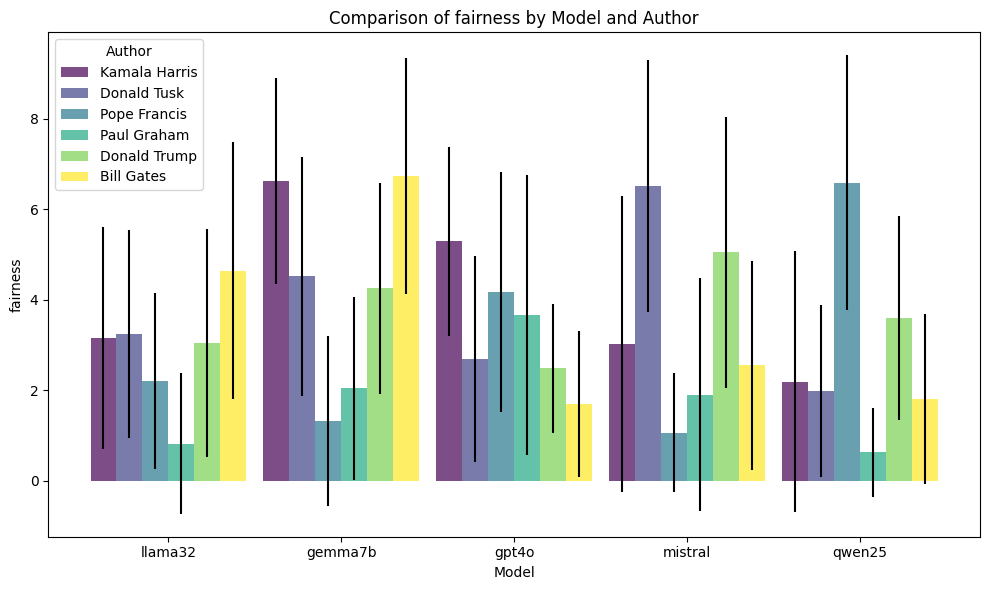

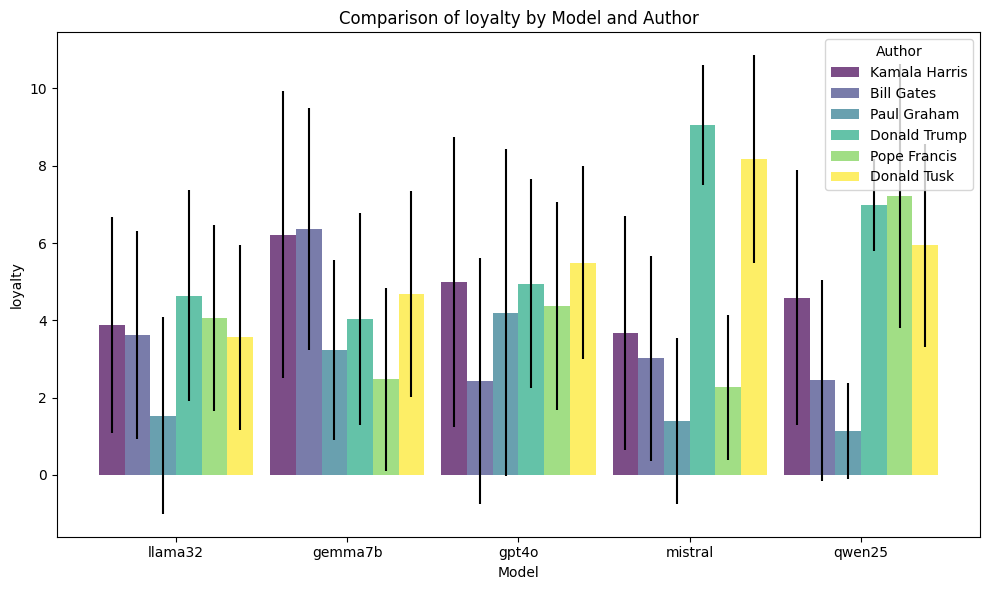

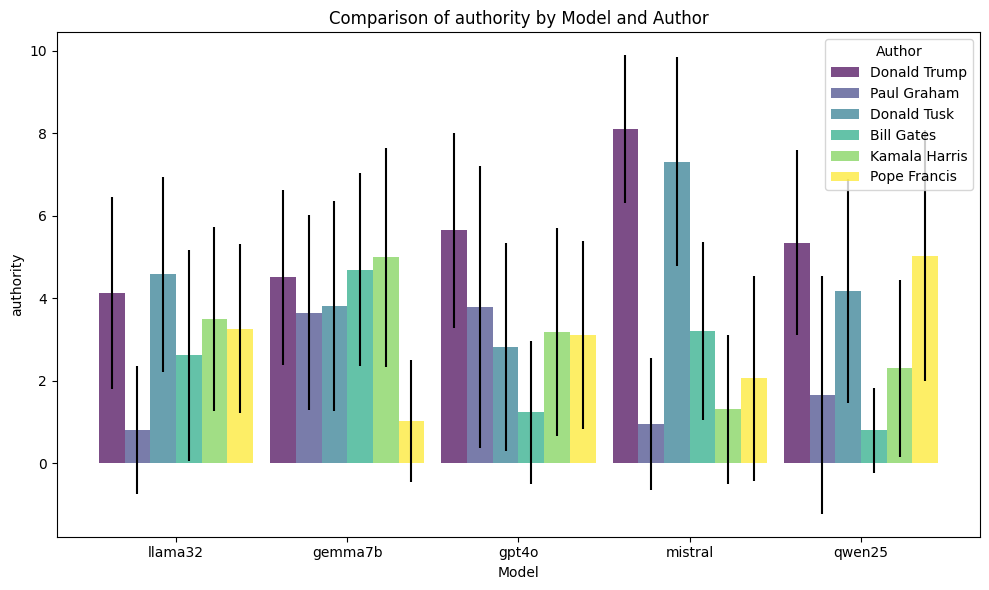

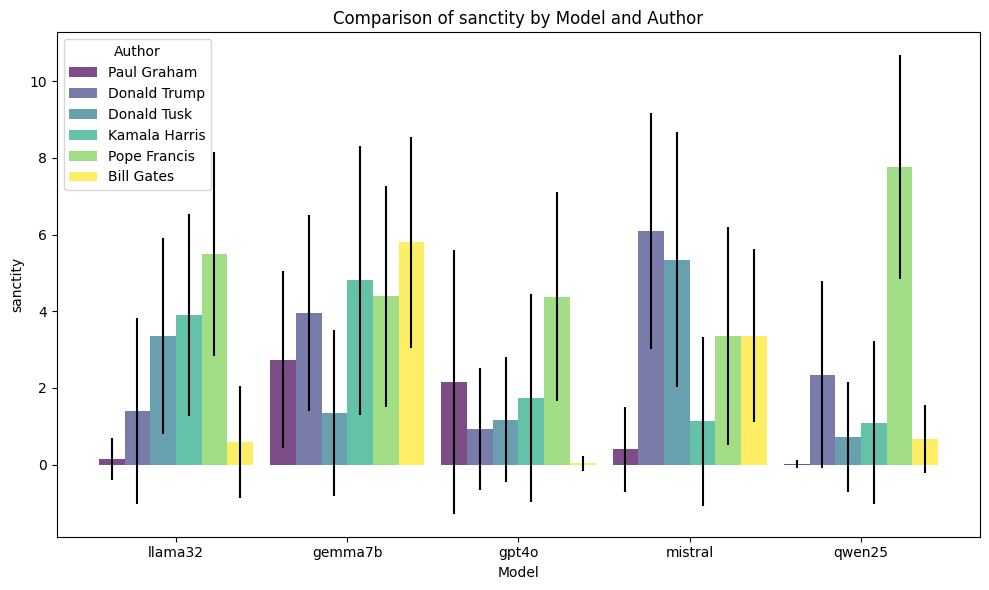

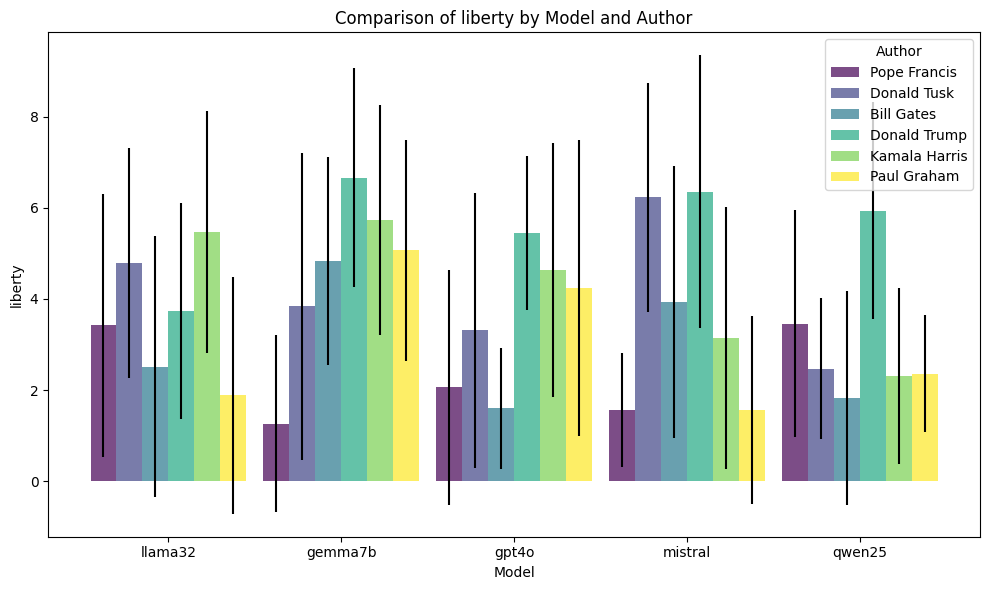

In [23]:
import numpy as np

# Assuming summary_df is already defined and contains mean and std columns
bar_width = 0.15  # Width of each bar
x_labels = summary_df["model"].unique()  # Unique models
num_authors = len(summary_df["author"].unique())  # Number of unique authors

# Create a mapping of authors to colors or styles if needed
colors = plt.cm.viridis(np.linspace(0, 1, num_authors))

for column in ["mean_care", "mean_fairness", "mean_loyalty", "mean_authority", "mean_sanctity", "mean_liberty"]:
    plt.figure(figsize=(10, 6))
    
    for i, author in enumerate(summary_df["author"].unique()):
        author_data = summary_df.filter(pl.col("author") == author).to_pandas()  # Convert to Pandas DataFrame for easier plotting
        
        # Calculate x positions for each author's bars
        x_pos = np.arange(len(x_labels)) + (i * bar_width)
        
        # Plot bars with error bars
        plt.bar(x_pos, author_data[column], width=bar_width, 
                yerr=author_data[column.replace('mean', 'std')], 
                label=author, alpha=0.7, color=colors[i])

    # Adjust x-ticks and labels
    plt.xticks(np.arange(len(x_labels)) + (num_authors - 1) * bar_width / 2, x_labels)
    
    plt.title(f'Comparison of {column.replace("mean_", "")} by Model and Author')
    plt.xlabel('Model')
    plt.ylabel(column.replace('mean_', ''))
    plt.legend(title='Author')
    plt.tight_layout()  # Adjust layout to prevent clipping of labels
    plt.show()

In [33]:
# Step 1: Separate regular authors and anon authors
regular_authors = df.filter(~pl.col("author").str.contains("-anon"))
anon_authors = df.filter(pl.col("author").str.contains("-anon"))

# Step 2: Calculate means for each author type
regular_means = (
    regular_authors.group_by("author")
    .agg([
        pl.col("care").mean().alias("mean_care"),
        pl.col("fairness").mean().alias("mean_fairness"),
        pl.col("loyalty").mean().alias("mean_loyalty"),
        pl.col("authority").mean().alias("mean_authority"),
        pl.col("sanctity").mean().alias("mean_sanctity"),
        pl.col("liberty").mean().alias("mean_liberty")
    ])
)

anon_means = (
    anon_authors.group_by(pl.col("author").str.replace("-anon", "")).agg([
        pl.col("care").mean().alias("mean_care"),
        pl.col("fairness").mean().alias("mean_fairness"),
        pl.col("loyalty").mean().alias("mean_loyalty"),
        pl.col("authority").mean().alias("mean_authority"),
        pl.col("sanctity").mean().alias("mean_sanctity"),
        pl.col("liberty").mean().alias("mean_liberty")
    ])
)

# Step 3: Merge results for comparison
comparison_df = regular_means.join(anon_means, on="author", suffix="_anon")

# Display comparison results
print("\nComparison of Regular and Anon Authors:")
comparison_df


Comparison of Regular and Anon Authors:


author,mean_care,mean_fairness,mean_loyalty,mean_authority,mean_sanctity,mean_liberty,mean_care_anon,mean_fairness_anon,mean_loyalty_anon,mean_authority_anon,mean_sanctity_anon,mean_liberty_anon
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""Paul Graham""",0.015217,-0.468478,-0.085435,-0.127391,-0.33,1.113043,0.391667,-0.195833,0.628274,0.421958,-0.100298,1.098214
"""Donald Tusk""",1.539279,0.147093,4.339116,3.23634,0.687972,0.992051,2.163246,0.347595,3.8461,3.124474,0.916813,1.154415
"""Kamala Harris""",3.952754,2.645551,4.254873,2.296398,1.919765,2.796822,4.683664,2.731295,3.836915,1.971433,2.190028,3.075399
"""Donald Trump""",-0.882697,-1.607865,4.576854,3.74427,1.37088,3.001798,0.188406,-0.374493,4.434783,4.389565,1.272174,3.869565
"""Bill Gates""",6.678989,3.407823,3.412716,2.075065,1.853543,2.780846,6.532249,3.240379,3.315718,1.983198,1.993225,2.897832
"""Pope Francis""",7.307368,2.584388,3.555789,2.32,4.696842,0.976793,6.050986,1.818592,3.406497,2.092938,4.172881,1.446328
